In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
mouse_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
clinical_trial = pd.read_csv(clinical_trial_data_to_load)
clinical_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_trial = pd.merge(clinical_trial, mouse_drug, on="Mouse ID")


In [5]:
# Display the data table for preview
mouse_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume = mouse_trial.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()


# Convert to DataFrame
tumor_volume_df = pd.DataFrame(tumor_volume)

# Preview DataFrame
tumor_volume_df.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se = mouse_trial.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_se_df = pd.DataFrame(tumor_se)

# Preview DataFrame
tumor_se_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
tumor_se_df = tumor_se_df.unstack(0)

# Preview that Reformatting worked
tumor_se_df.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

In [9]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_df = tumor_volume_df.unstack(0)

# Preview that Reformatting worked
tumor_volume_df.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


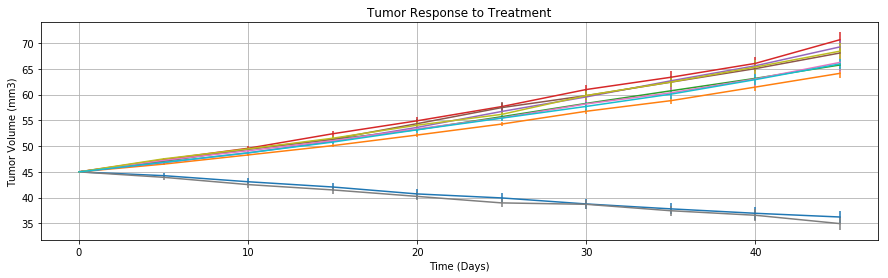

In [10]:
# Generate the Plot (with Error Bars)
tumor_volume_df.plot(yerr=tumor_se_df, figsize=(15,4), legend=None)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid("on")

In [70]:
# Save the Figure
plt.savefig("../Images/tumor_volume_graph.png")

<Figure size 432x288 with 0 Axes>

In [11]:
# Show the Figure
plt.show()

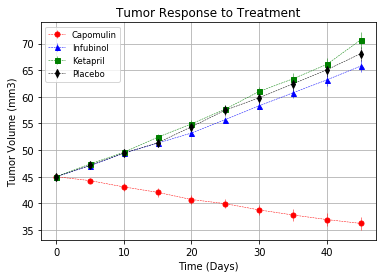

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean = mouse_trial.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
met_site_mean_df = pd.DataFrame(met_site_mean)


# Preview DataFrame
met_site_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_se = mouse_trial.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
met_site_se_df = pd.DataFrame(met_site_se)


# Preview DataFrame
met_site_se_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [14]:
# Minor Data Munging to Re-Format the Data Frames
met_site_mean_df = met_site_mean_df.unstack(0)

# Preview that Reformatting worked
met_site_mean_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [15]:
# Minor Data Munging to Re-Format the Data Frames
met_site_se_df = met_site_se_df.unstack(0)

# Preview that Reformatting worked
met_site_se_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


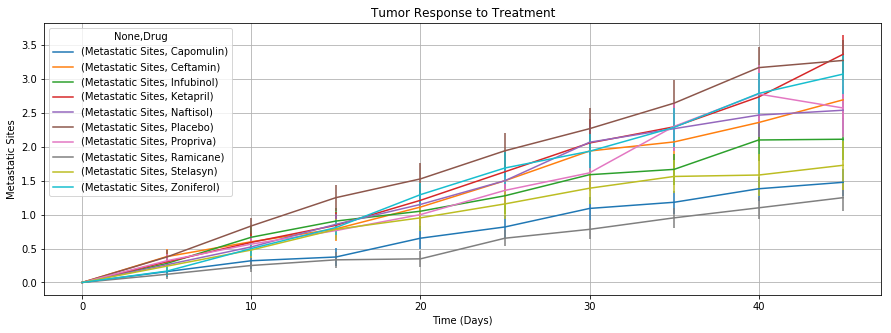

In [16]:
# Generate the Plot (with Error Bars)
met_site_mean_df.plot(yerr=met_site_se_df, figsize=(15,5), legend='best')

plt.title("Tumor Response to Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (Days)")
plt.grid("on")

In [17]:
# Save the Figure
plt.savefig("../Images/met_site_graph.png")

<Figure size 432x288 with 0 Axes>

In [18]:
# Show the Figure
plt.show()

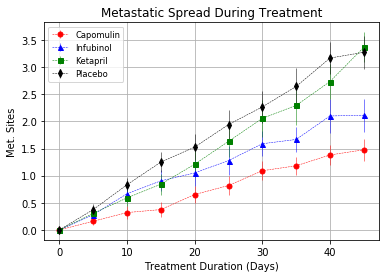

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = mouse_trial.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df.rename(index=str, columns={"Mouse ID": "Mouse Count"}, inplace=True)


# Preview DataFrame
mouse_count_df.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df = mouse_count_df.unstack(0)

# Preview the Data Frame
mouse_count_df.head(100)

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   
5                  25       21        25       23       23      24       25   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14  
5               25       25        24

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [22]:
# Generate the Plot (Accounting for percentages)
mouse_count_percent_df = mouse_count_df/25*100

mouse_count_percent_df = mouse_count_percent_df.iloc[0:9,0:]


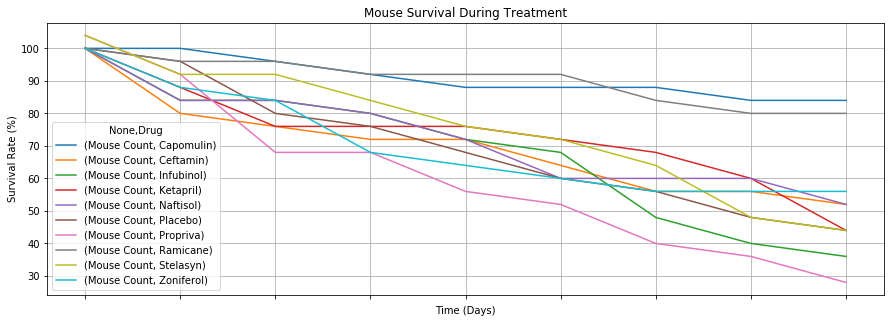

In [23]:
mouse_count_percent_df.plot(figsize=(15,5), legend='best')

plt.title("Mouse Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid("on")

# Save the Figure
plt.savefig("../Images/mouse_survive_graph.png")

# Show the Figure
plt.show()

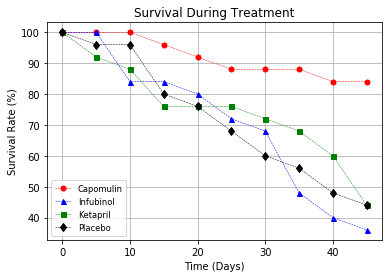

## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug
tumor_volume_summary_df = (tumor_volume_df.loc[45] - tumor_volume_df.loc[0])/tumor_volume_df.loc[0] *100
tumor_volume_summary_df

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

In [25]:
# Display the data to confirm
tumor_volume_summary_df = tumor_volume_summary_df.sort_values()
tumor_volume_summary_df

                    Drug     
Tumor Volume (mm3)  Ramicane    -22.320900
                    Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Zoniferol    46.579751
                    Propriva     47.241175
                    Placebo      51.297960
                    Stelasyn     52.085134
                    Naftisol     53.923347
                    Ketapril     57.028795
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple
tumor_volume_summary_tuple = tuple(tumor_volume_summary_df)

In [26]:
# Splice the data between passing and failing drugs
tumor_volume_summary_tuple_success = tumor_volume_summary_df[0:2]
tumor_volume_summary_tuple_success

                    Drug     
Tumor Volume (mm3)  Ramicane    -22.320900
                    Capomulin   -19.475303
dtype: float64

In [27]:
tumor_volume_summary_tuple_fail = tumor_volume_summary_df[2:]
tumor_volume_summary_tuple_fail

                    Drug     
Tumor Volume (mm3)  Ceftamin     42.516492
                    Infubinol    46.123472
                    Zoniferol    46.579751
                    Propriva     47.241175
                    Placebo      51.297960
                    Stelasyn     52.085134
                    Naftisol     53.923347
                    Ketapril     57.028795
dtype: float64

In [28]:
tumor_volume_transpose = tumor_volume_summary_df.unstack()
tumor_volume_transpose

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Volume (mm3),-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,47.241175,-22.3209,52.085134,46.579751


In [29]:
tumor_volume_summary_df[1]

-19.475302667894155

In [30]:
# Orient widths. Add labels, tick marks, etc. 
my_colors = []
y=0

for x in tumor_volume_summary_df:
    if tumor_volume_summary_df[y] < 0.0:
        my_colors.append("g")
    else:
        my_colors.append("r")
    y = y+1

my_colors


['g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']

In [31]:
tumor_volume_summary_index = tumor_volume_summary_df.index.get_level_values(1)
tumor_volume_summary_index

Index(['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol', 'Zoniferol',
       'Propriva', 'Placebo', 'Stelasyn', 'Naftisol', 'Ketapril'],
      dtype='object', name='Drug')

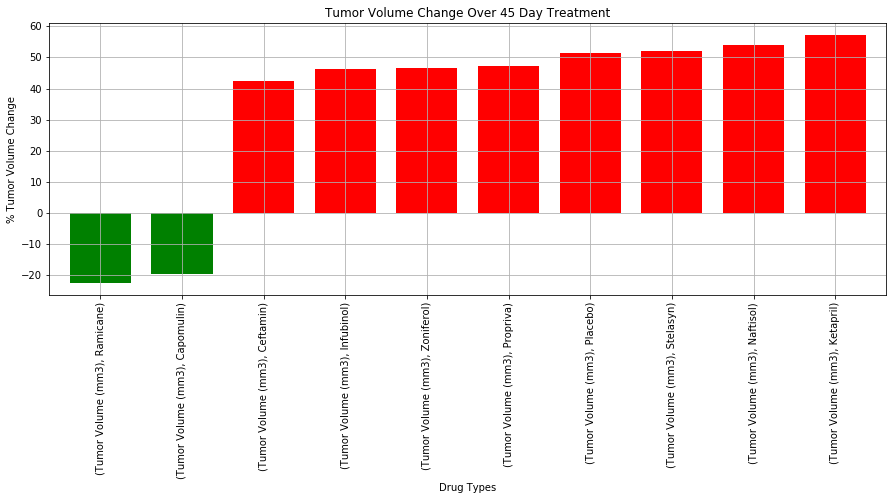

In [34]:
ax = tumor_volume_summary_df.plot(kind="bar", width=0.75, figsize=(15,5), color= my_colors)

plt.title("Tumor Volume Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlabel("Drug Types")
plt.grid("on")



# Use functions to label the percentages of changes


# Call functions to implement the function calls



In [35]:
# Save the Figure
plt.savefig("../Images/tumor_change_chart.png")

# Show the Figure
plt.show()


<Figure size 432x288 with 0 Axes>

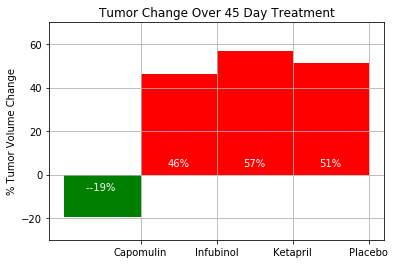